### 

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 11 19:15:23 2020

@author: juan
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from numpy import asarray
from numpy import savetxt

import os

import time

import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

start = time.time() #Saves the begining time of the process

os.makedirs('GraficasProyDNN',exist_ok=True)


In [2]:
#==============================================================================
#LEER DATOS
#==============================================================================
fecha = '2022-11-26'

casos = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

sintomas = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

poblaciones = pd.read_excel('PoblacionMunicipal.xlsx')

#==============================================================================
#ELIMINAR SIN DATO
#==============================================================================

casos = casos[casos.codigo_municipio != 99]

sintomas = sintomas[sintomas.codigo_municipio != 99]

codigoCasos = casos['codigo_municipio']

codigoSintomas = sintomas['codigo_municipio']

codigoPob = poblaciones['codigo_municipio']

faltanCasosMuni = np.array(list(set(casos.municipio).symmetric_difference(poblaciones.municipio)))
faltanCasosDepto = []
for i in range(len(faltanCasosMuni)):
    faltanCasosDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'departamento'].iloc[0])
faltanCasosCodigoMuni = []
for i in range(len(faltanCasosMuni)):
    faltanCasosCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'codigo_municipio'].iloc[0])
faltanCasosPob = []
for i in range(len(faltanCasosMuni)):
    faltanCasosPob.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'poblacion'].iloc[0])
faltanCasosCodigoDepto = []
for i in range(len(faltanCasosMuni)):
    if faltanCasosDepto[i] == 'ALTA VERAPAZ':
        faltanCasosCodigoDepto.append(16)
    elif faltanCasosDepto[i] == 'BAJA VERAPAZ':
        faltanCasosCodigoDepto.append(15)
    elif faltanCasosDepto[i] == 'CHIMALTENANGO':
        faltanCasosCodigoDepto.append(4)
    elif faltanCasosDepto[i] == 'CHIQUIMULA':
        faltanCasosCodigoDepto.append(20)
    elif faltanCasosDepto[i] == 'EL PROGRESO':
        faltanCasosCodigoDepto.append(2)
    elif faltanCasosDepto[i] == 'ESCUINTLA':
        faltanCasosCodigoDepto.append(5)
    elif faltanCasosDepto[i] == 'GUATEMALA':
        faltanCasosCodigoDepto.append(1)
    elif faltanCasosDepto[i] == 'HUEHUETENANGO':
        faltanCasosCodigoDepto.append(13)
    elif faltanCasosDepto[i] == 'IZABAL':
        faltanCasosCodigoDepto.append(18)
    elif faltanCasosDepto[i] == 'JALAPA':
        faltanCasosCodigoDepto.append(21)
    elif faltanCasosDepto[i] == 'JUTIAPA':
        faltanCasosCodigoDepto.append(22)
    elif faltanCasosDepto[i] == 'PETEN':
        faltanCasosCodigoDepto.append(17)
    elif faltanCasosDepto[i] == 'QUETZALTENANGO':
        faltanCasosCodigoDepto.append(9)
    elif faltanCasosDepto[i] == 'QUICHE':
        faltanCasosCodigoDepto.append(14)
    elif faltanCasosDepto[i] == 'RETALHULEU':
        faltanCasosCodigoDepto.append(11)
    elif faltanCasosDepto[i] == 'SACATEPEQUEZ':
        faltanCasosCodigoDepto.append(3)
    elif faltanCasosDepto[i] == 'SAN MARCOS':
        faltanCasosCodigoDepto.append(12)
    elif faltanCasosDepto[i] == 'SANTA ROSA':
        faltanCasosCodigoDepto.append(6)
    elif faltanCasosDepto[i] == 'SOLOLA':
        faltanCasosCodigoDepto.append(7)
    elif faltanCasosDepto[i] == 'SUCHITEPEQUEZ':
        faltanCasosCodigoDepto.append(10)
    elif faltanCasosDepto[i] == 'TOTONICAPAN':
        faltanCasosCodigoDepto.append(8)
    elif faltanCasosDepto[i] == 'ZACAPA':
        faltanCasosCodigoDepto.append(19)

faltanSintomasMuni = np.array(list(set(sintomas.municipio).symmetric_difference(poblaciones.municipio)))
faltanSintomasDepto = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'departamento'].iloc[0])
faltanSintomasCodigoMuni = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'codigo_municipio'].iloc[0])
faltanSintomasPob = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasPob.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'poblacion'].iloc[0])
faltanSintomasCodigoDepto = []
for i in range(len(faltanSintomasMuni)):
    if faltanSintomasDepto[i] == 'ALTA VERAPAZ':
        faltanSintomasCodigoDepto.append(16)
    elif faltanSintomasDepto[i] == 'BAJA VERAPAZ':
        faltanSintomasCodigoDepto.append(15)
    elif faltanSintomasDepto[i] == 'CHIMALTENANGO':
        faltanSintomasCodigoDepto.append(4)
    elif faltanSintomasDepto[i] == 'CHIQUIMULA':
        faltanSintomasCodigoDepto.append(20)
    elif faltanSintomasDepto[i] == 'EL PROGRESO':
        faltanSintomasCodigoDepto.append(2)
    elif faltanSintomasDepto[i] == 'ESCUINTLA':
        faltanSintomasCodigoDepto.append(5)
    elif faltanSintomasDepto[i] == 'GUATEMALA':
        faltanSintomasCodigoDepto.append(1)
    elif faltanSintomasDepto[i] == 'HUEHUETENANGO':
        faltanSintomasCodigoDepto.append(13)
    elif faltanSintomasDepto[i] == 'IZABAL':
        faltanSintomasCodigoDepto.append(18)
    elif faltanSintomasDepto[i] == 'JALAPA':
        faltanSintomasCodigoDepto.append(21)
    elif faltanSintomasDepto[i] == 'JUTIAPA':
        faltanSintomasCodigoDepto.append(22)
    elif faltanSintomasDepto[i] == 'PETEN':
        faltanSintomasCodigoDepto.append(17)
    elif faltanSintomasDepto[i] == 'QUETZALTENANGO':
        faltanSintomasCodigoDepto.append(9)
    elif faltanSintomasDepto[i] == 'QUICHE':
        faltanSintomasCodigoDepto.append(14)
    elif faltanSintomasDepto[i] == 'RETALHULEU':
        faltanSintomasCodigoDepto.append(11)
    elif faltanSintomasDepto[i] == 'SACATEPEQUEZ':
        faltanSintomasCodigoDepto.append(3)
    elif faltanSintomasDepto[i] == 'SAN MARCOS':
        faltanSintomasCodigoDepto.append(12)
    elif faltanSintomasDepto[i] == 'SANTA ROSA':
        faltanSintomasCodigoDepto.append(6)
    elif faltanSintomasDepto[i] == 'SOLOLA':
        faltanSintomasCodigoDepto.append(7)
    elif faltanSintomasDepto[i] == 'SUCHITEPEQUEZ':
        faltanSintomasCodigoDepto.append(10)
    elif faltanSintomasDepto[i] == 'TOTONICAPAN':
        faltanSintomasCodigoDepto.append(8)
    elif faltanSintomasDepto[i] == 'ZACAPA':
        faltanSintomasCodigoDepto.append(19)
#==============================================================================
#AGREGAR DATOS QUE FALTAN
#==============================================================================
#extraer una fila del df de casos´
primerafila = casos.iloc[1]
primerafila = primerafila.iloc[5:].values
datosFaltan = np.zeros(len(primerafila))

datosFaltanCasosCols = casos.columns
datosFaltanSintomasCols = sintomas.columns

datosFaltanCasos = np.zeros((len(faltanCasosDepto),len(datosFaltanCasosCols))).astype(object)
for i in range(len(faltanCasosDepto)):
    for j in range(len(datosFaltanCasosCols)):
        if j ==0:
            datosFaltanCasos[i][j] = faltanCasosDepto[i]
        elif j==1:
            datosFaltanCasos[i][j] = faltanCasosCodigoDepto[i]
        elif j==2:
            datosFaltanCasos[i][j] = faltanCasosMuni[i]
        elif j==3:
            datosFaltanCasos[i][j] = faltanCasosCodigoMuni[i]
        elif j==4:
            datosFaltanCasos[i][j] = faltanCasosPob[i]
            
datosFaltanSintomas = np.zeros((len(faltanSintomasDepto),len(datosFaltanSintomasCols))).astype(object)
for i in range(len(faltanSintomasDepto)):
    for j in range(len(datosFaltanSintomasCols)):
        if j ==0:
            datosFaltanSintomas[i][j] = faltanSintomasDepto[i]
        elif j==1:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoDepto[i]
        elif j==2:
            datosFaltanSintomas[i][j] = faltanSintomasMuni[i]
        elif j==3:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoMuni[i]
        elif j==4:
            datosFaltanSintomas[i][j] = faltanSintomasPob[i]
            
FaltanCasos = pd.DataFrame(datosFaltanCasos,columns=casos.columns)
FaltanSintomas = pd.DataFrame(datosFaltanSintomas,columns=sintomas.columns)

print('En casos positivos no hay datos de ' + str(FaltanCasos['municipio'].values))
print('En sintomas no hay datos de ' + str(FaltanSintomas['municipio'].values))

casos = casos.append(FaltanCasos)
sintomas = sintomas.append(FaltanSintomas)


En casos positivos no hay datos de []
En sintomas no hay datos de []


/tmp/ipykernel_3654/2070872721.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  casos = casos.append(FaltanCasos)
/tmp/ipykernel_3654/2070872721.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sintomas = sintomas.append(FaltanSintomas)


In [3]:
faltanCasosMuni

array([], dtype=float64)

In [4]:
#==============================================================================
#EXTRAER DATOS POR DEPARTAMENTO
#==============================================================================

departamentos = casos['departamento'].unique()
municipios = casos['municipio'].unique()

casosDepto = {}
for depto in departamentos:
    casosDepto[depto] = pd.DataFrame(casos.loc[casos['departamento'] == depto])
    casosDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    casosDepto[depto] = casosDepto[depto].set_index('municipio')
    
sintomasDepto = {}

for depto in departamentos:
    sintomasDepto[depto] = pd.DataFrame(sintomas.loc[sintomas['departamento'] == depto])
    sintomasDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    sintomasDepto[depto] = sintomasDepto[depto].set_index('municipio')
    
pobDepto = {}

for depto in departamentos:
    pobDepto[depto] = pd.DataFrame(poblaciones.loc[poblaciones['departamento'] == depto])
    pobDepto[depto].drop(['codigo_municipio','departamento'], axis = 1, inplace = True)
    pobDepto[depto] = pobDepto[depto].set_index('municipio')
    

In [5]:
#municipios

In [6]:
#==============================================================================
#DATOS POR DEPARTAMENTO UTILES
#==============================================================================
fechas = casosDepto['GUATEMALA'].columns.values
fechas1 = fechas[7::14]
fechas2 = fechas1[1:len(fechas1)]
diasMediaMovil = 14

NOMBREDEPTO = []
Poblacion =[]
POSITIVOSDEPTO = []
SINTOMASDEPTO = []

for depto in departamentos:
    pob = 0
    cantidadMunicipios = len(casosDepto[depto].index)
    positivosDepto = np.zeros(len(fechas))
    sintomasTotalesDepto = np.zeros(len(fechas))
    mediamovilDepto = np.zeros(len(fechas)-diasMediaMovil)
    
    for muni in casosDepto[depto].index:
        
        positivos = casosDepto[depto].loc[muni].values.astype(float)
        sintomasTotales = sintomasDepto[depto].loc[muni].values.astype(float)
        
        positivosDepto = positivos + positivosDepto
        
        sintomasTotalesDepto = sintomasTotalesDepto + sintomasTotales
        
        pob += pobDepto[depto].loc[muni].values[0]
        
    for i in range(len(positivosDepto)-diasMediaMovil):
        mediamovilDepto[i] = np.mean(positivosDepto[i:i+diasMediaMovil]) #LINEA IMPORTANTE
    
    NOMBREDEPTO.append(depto)
    Poblacion.append(pob)
    POSITIVOSDEPTO.append(mediamovilDepto)#POSITIVOSDEPTO.append(positivosDepto)
    SINTOMASDEPTO.append(sintomasTotalesDepto)
    
acumuladosReportados = np.zeros((len(NOMBREDEPTO),len(POSITIVOSDEPTO[0])))
acumuladosSintomas = np.zeros((len(NOMBREDEPTO),len(POSITIVOSDEPTO[0])))

for j in range(len(NOMBREDEPTO)):
    for i in range(len(POSITIVOSDEPTO[0])-1):
        if i ==0:
            acumuladosReportados[j][i] = POSITIVOSDEPTO[j][i]
            acumuladosSintomas[j][i] = SINTOMASDEPTO[j][i]
            
        else:
            acumuladosReportados[j][i] = acumuladosReportados[j][i-1] + POSITIVOSDEPTO[j][i]
            acumuladosSintomas[j][i] = acumuladosSintomas[j][i-1] + SINTOMASDEPTO[j][i]
#HASTA ACA LIMPIEZA Y EXTRACCION DE DATOS


In [7]:
fechas[0]

'2020-02-14'

In [8]:
#==============================================================================
#ESTIMACIONES DE BETA y OTRAS VARIABLES DEL MODELO SIR
#==============================================================================
#INICIALIZACION DE VARIABLES
gamma = 1./21.
gamma_inv = int(1/gamma)
A = acumuladosReportados #TOTAL DE INDIVIDUOS QUE SE HAN INFECTADO.
dA = POSITIVOSDEPTO #CASOS NUEVOS REPORTADOS CADA DIA POR CADA DEPARTAMENTO
R = np.zeros((len(A),len(A[0])))
I = A - R
S = np.zeros((len(A),len(A[0])))
Beta = np.zeros((len(A),len(A[0])))
Rt = np.zeros((len(A),len(A[0])))
R0 = np.zeros((len(A),len(A[0])))

inicio = 100

for i in range(len(A)):
    for j in range(len(A[0])):
        S[i][j] = Poblacion[i] - A[i][j] #ECUACION (4.37)
        
for i in range(len(A)):
    N = Poblacion[i]
    for j in range(len(A[0])-1):
        if j>(gamma_inv-1): #porque empezamos desde j=0.
            R[i][j] = dA[i][j-gamma_inv] + R[i][j-1] #ECUACION (4.38)
        else:
            R[i][j] = 0
            
        if A[i][j] - R[i][j] <= 0:
            I[i][j] = I[i][j-1]
        else:
            I[i][j] = A[i][j] - R[i][j] #ECUACION (4.39)
        S[i][j] = N - I[i][j] - R[i][j]
        Beta[i][j] = dA[i][j+1]/(S[i][j]*I[i][j])*N ##ECUACION (5.1)
        #mas adelante quitar el ultimo de beta porque es cero.
        Rt[i][j] = Beta[i][j]/gamma * S[i][j]/N
        R0[i][j] = Beta[i][j]/gamma
        
        if A[i][j] <= 0:
            A[i][j] = A[i][j-1]


In [10]:
def Normalizar(x, Poblacion):
    y = np.array(x)
    for i in range(len(y)):
        y[i] = y[i]/Poblacion[i]
    return y
    

In [11]:

In = Normalizar(I,Poblacion)
Sn = Normalizar(S,Poblacion)
Rn = Normalizar(R,Poblacion)
dAn = Normalizar(dA,Poblacion)
An = Normalizar(A,Poblacion)
Bn = Normalizar(Beta,Poblacion)

In [12]:
fechas[17] #esta base de datos va cada dos dias. el día 17 es el del primer infectado.
#que la limpeiza sea mejor empezar desde el dia 17

'2020-03-13'

In [13]:
fechas[80]

'2020-05-16'

In [14]:
#Beta_clean = Beta[0][0:][~(np.isnan(Beta[0][0:]))]
#Beta_clean = Beta_clean[~np.isinf(Beta_clean)]
#Beta_clean

In [15]:
len(Beta[0])-1 #el ultimo dia no tiene datos

990

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


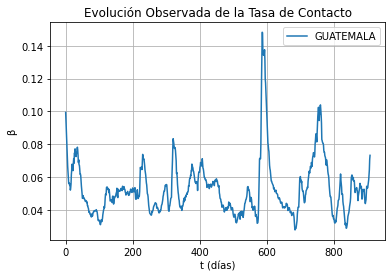

In [16]:
n=0
plt.plot(Beta[0][80:len(Beta[0])-1], label = NOMBREDEPTO[0])
plt.legend(loc="best")
plt.title("Evolución Observada de la Tasa de Contacto") 

plt.xlabel("t (días)")
plt.ylabel("\u03B2")
plt.grid()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'TODO_BETA.eps', bbox_inches = 'tight')

#plt.scatter([0, 1,2,3,4,5,6,7,8,9],Beta[0][660:670])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


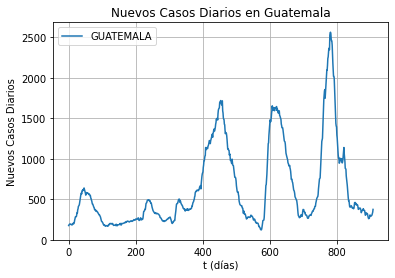

In [17]:
#analizar
plt.plot(dA[0][80:len(Beta[0])-1], label = NOMBREDEPTO[0])
plt.legend(loc="best")
plt.title("Nuevos Casos Diarios en Guatemala")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")
plt.grid()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'TODAS.eps', bbox_inches = 'tight')


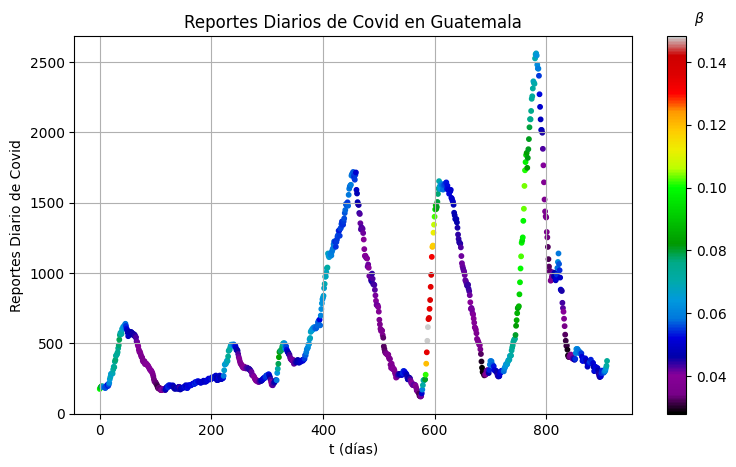

<Figure size 432x288 with 0 Axes>

In [11]:
from matplotlib.pyplot import figure

n=0
t1 = 80
t2 = len(Beta[n])-1


color = []
t = []
T = t2-t1
for i in range(T):
    color.append(Beta[n][t1+i])
    t.append(i)

figure(figsize=(9, 5), dpi=100)
plt.scatter(t, dA[0][80:len(Beta[0])-1], c=color, s=10, cmap='nipy_spectral')
clb =  plt.colorbar()
clb.set_label("$\u03B2$", labelpad=-20, y=1.07, rotation=0)

plt.title("Reportes Diarios de Covid en Guatemala") 
plt.xlabel("t (días)")
plt.ylabel("Reportes Diario de Covid")
plt.locator_params(nbins=9)
plt.grid(True)
plt.show()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'TODAS_barra.eps', bbox_inches = 'tight')





In [12]:
len(Beta[0][80:])

911

In [13]:

def DifFinitas2(I0,S0,R0,BetaCoef,n,Poblacion,dA0,A0, gamma, t, dt):
    Infectados = [I0]
    Sucept = [S0] ##########OJO EL PRIMER RESULTADO DE LA SOLUCION ES IGUAL AL VALOR INICIAL, LO MODIFICAREMOS
    Removidos = [R0]
    RepDiario = [dA0]
    ACUMULADO = [A0]
    gamma_inv = int(1/gamma)
    TamanioPrueba = t #el tamanio final es TamanioPrueba + 1
    for j in range(TamanioPrueba):
#        dA1 = BetaCoef[j][0]*I0*S0/Poblacion[n] - gamma*I0 #por persona
        #no tengo que restarle los recuperados a los acumulados, debo restarlo en los infectados actuales
    #    dA1 = BetaCoef[j][0]*I0*S0 - gamma*I0
        dA1 = BetaCoef[j]*I0*S0/Poblacion[n]
        S1 = S0 - BetaCoef[j]*I0*S0/Poblacion[n]
        A1 = A0 + dA1
        R1 = R0 + gamma*I0
        I1 = I0 + dA1  -  gamma*I0 
        #if j > (gamma_inv-1):
        #    R1 = R0 + RepDiario[j-gamma_inv]
        #    I1 = I0 + dA1  - RepDiario[j-gamma_inv]
        #else:
        #    R1 = R0
        #    I1 = I0 + dA1
        Infectados.append(I1)
        Sucept.append(S1)
        Removidos.append(R1)
        RepDiario.append(dA1)
        ACUMULADO.append(A1)
        I0, S0, R0, A0 = I1, S1, R1, A1
    return Infectados, Sucept, Removidos, ACUMULADO, RepDiario



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


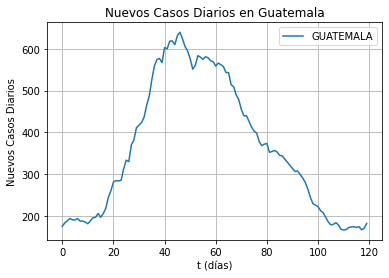

In [14]:
#analizar
t1=80
t2 = 200
plt.plot(dA[0][t1:t2], label = NOMBREDEPTO[0])
plt.legend(loc="best")
plt.title("Nuevos Casos Diarios en Guatemala")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")
plt.grid()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'OLA1.eps', bbox_inches = 'tight')



In [44]:
t1=80
t2 = 200
t=1800
t2_medio = 47+t1
A0 , dA0, S0, I0, R0 = A[n][t1], dA[n][t1], S[n][t1], I[n][t1], R[n][t1] 
Beta_mean = np.mean(np.array(Beta[n][t1:t2_medio]))

BetaCoef = []
for i in range(t2_medio-t1):
    BetaCoef.append(Beta_mean) 


In [45]:
Beta_mean

0.06863338122731816

In [46]:
#t =t2-t1
dt = 1
Infectados, Sucept, Removidos, ACUMULADO, RepDiario = DifFinitas2(I0,S0,R0,BetaCoef,n,Poblacion,dA0,A0, gamma, 47,dt)
#Infectados, Sucept, Removidos, ACUMULADO, RepDiario = RK(I0,S0,R0,BetaCoef,n,Poblacion,dA0,A0, gamma, t,dt)
#Pudo usar BetaCoef o Beta[0] que corresponde a beta para guatemala

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


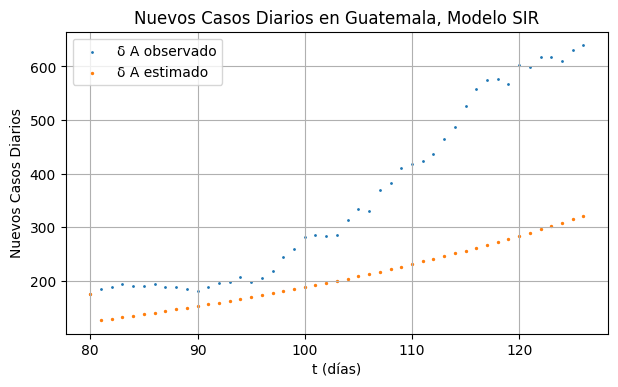

In [47]:
t = t2_medio-t1
color = []
for i in range(t1,t2_medio):
    color.append(i)

from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=100)
plt.scatter(color, dA[0][t1:t2_medio],  s=1, label = '\u03B4 A observado')#, cmap='nipy_spectral')
plt.scatter(color, RepDiario[0:t],  s=2 , label = '\u03B4 A estimado')
plt.legend(loc="best")
plt.title("Nuevos Casos Diarios en Guatemala, Modelo SIR")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")
plt.grid()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'OLA1_BetaUp.eps', bbox_inches = 'tight')


In [48]:
#parte 2

In [49]:
t1 = t2_medio
t2 = 200
t=1800
A0 , dA0, S0, I0, R0 = A[n][t1], dA[n][t1], S[n][t1], I[n][t1], R[n][t1] 
Beta_mean = np.mean(np.array(Beta[n][t1:t2]))

BetaCoef = []
for i in range(t1,t2):
    BetaCoef.append(Beta_mean) 

In [50]:
Beta_mean

0.04027872880123266

In [51]:
#t =t2-t1
dt = 1
Infectados, Sucept, Removidos, ACUMULADO, RepDiario = DifFinitas2(I0,S0,R0,BetaCoef,n,Poblacion,dA0,A0, gamma, t2-t1,dt)
#Infectados, Sucept, Removidos, ACUMULADO, RepDiario = RK(I0,S0,R0,BetaCoef,n,Poblacion,dA0,A0, gamma, t,dt)
#Pudo usar BetaCoef o Beta[0] que corresponde a beta para guatemala

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


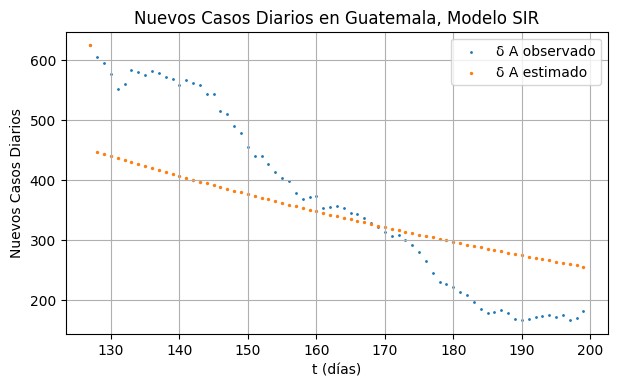

In [52]:
t = t2-t1
color = []
for i in range(0,t):
    color.append(i)
x= []
for i in range(t1, t2):
    x.append(i)
    
from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=100)
plt.scatter(x, dA[0][t1:t2],  s=1, label = '\u03B4 A observado')#, cmap='nipy_spectral')
plt.scatter(x, RepDiario[0:t],  s=2 , label = '\u03B4 A estimado')
plt.legend(loc="best")
plt.title("Nuevos Casos Diarios en Guatemala, Modelo SIR")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")
plt.grid()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'OLA1_BetaDown.eps', bbox_inches = 'tight')


In [29]:
t, t2_medio, t1, t2

(73, 127, 127, 200)

In [54]:
fechas[716]

'2022-02-11'

In [31]:
#OLA 2

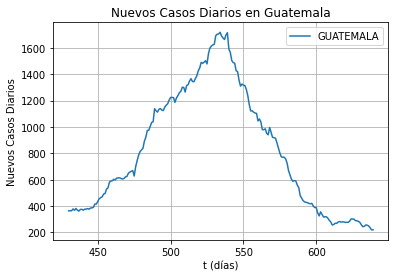

<Figure size 432x288 with 0 Axes>

In [32]:
#analizar
t1=80+350
t2 =80+ 560
x= []
for i in range(t1,t2):
    x.append(i)
plt.plot(x,dA[0][t1:t2], label = NOMBREDEPTO[0])
plt.legend(loc="best")
plt.title("Nuevos Casos Diarios en Guatemala")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")
plt.grid()
plt.show()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'OLA2.eps', bbox_inches = 'tight')


In [33]:
#analizar
t1=80+350
t2 =80+ 560
t=1000
x= []
for i in range(t1,t+t1):
    x.append(i)
A0 , dA0, S0, I0, R0 = A[n][t1], dA[n][t1], S[n][t1], I[n][t1], R[n][t1] 
Beta_mean = np.mean(np.array(Beta[n][t1:t2]))

BetaCoef = []
for i in range(t):
    BetaCoef.append(Beta_mean) 


In [34]:
#t =t2-t1
dt = 1
Infectados, Sucept, Removidos, ACUMULADO, RepDiario = DifFinitas2(I0,S0,R0,BetaCoef,n,Poblacion,dA0,A0, gamma, t,dt)
#Infectados, Sucept, Removidos, ACUMULADO, RepDiario = RK(I0,S0,R0,BetaCoef,n,Poblacion,dA0,A0, gamma, t,dt)
#Pudo usar BetaCoef o Beta[0] que corresponde a beta para guatemala

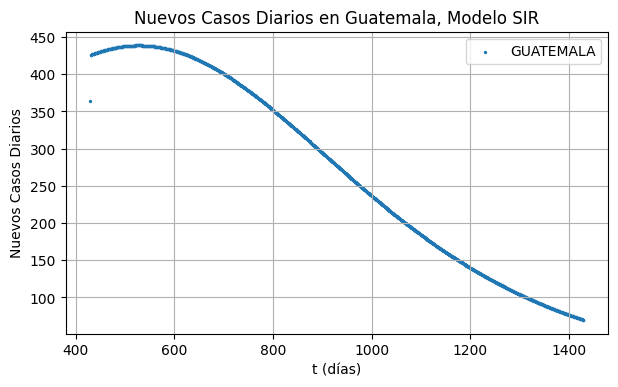

<Figure size 432x288 with 0 Axes>

In [35]:

color = []
for i in range(0,t):
    color.append(i)

from matplotlib.pyplot import figure

figure(figsize=(7, 4), dpi=100)
#plt.scatter(color, dA[0][t1:t2],  s=1)#, cmap='nipy_spectral')
plt.scatter(x,RepDiario[0:t],  s=2 , label = NOMBREDEPTO[0])
plt.legend(loc="best")
plt.title("Nuevos Casos Diarios en Guatemala, Modelo SIR")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")
plt.grid()
plt.show()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'OLA1_BetaConstante.eps', bbox_inches = 'tight')


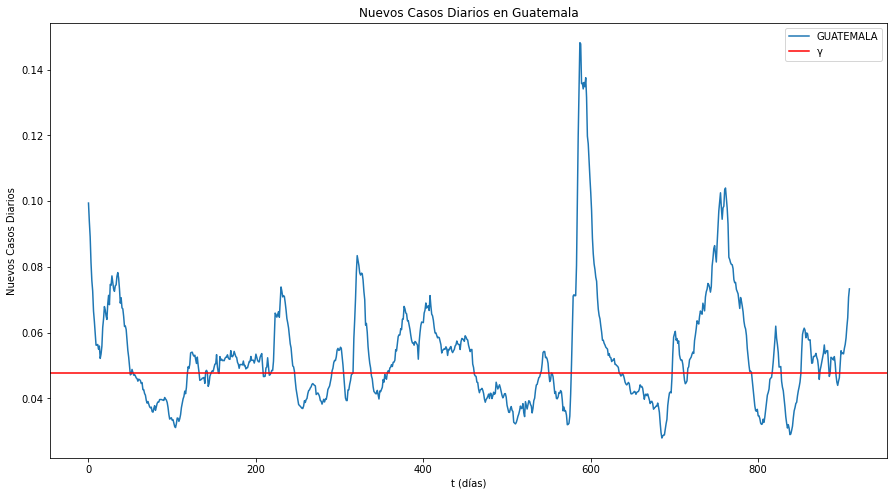

In [36]:
#analizar
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(Beta[0][80:len(Beta[0])-1], label = NOMBREDEPTO[0])
plt.legend(loc="best")
plt.title("Nuevos Casos Diarios en Guatemala")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")
plt.axhline(y = 1/21., color = 'r', linestyle = '-', label="\u03B3")
plt.legend(loc="best")


Text(0, 0.5, 'Nuevos Casos Diarios')

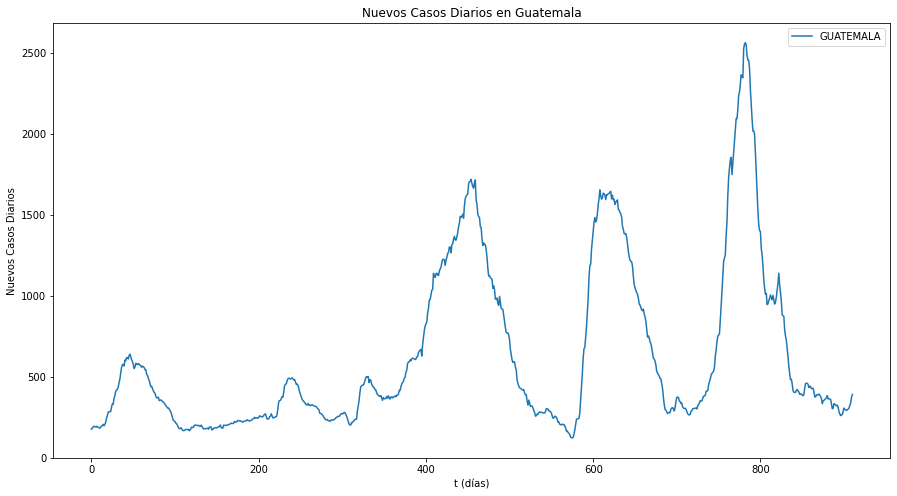

In [37]:
#analizar
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(dA[0][80:], label = NOMBREDEPTO[0])
plt.legend(loc="best")
plt.title("Nuevos Casos Diarios en Guatemala")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")

Text(0, 0.5, 'Nuevos Casos Diarios')

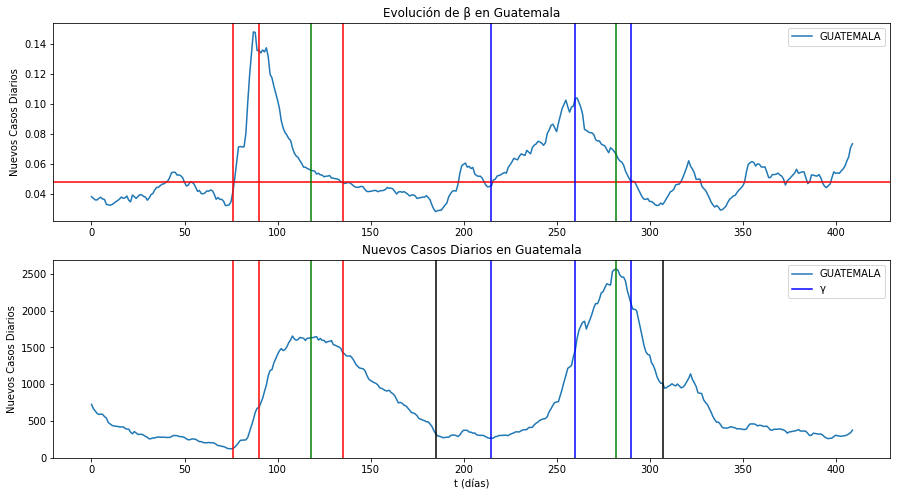

In [46]:
#analizar
fig, ax = plt.subplots(2,1, figsize=(15, 8))
ax[0].plot(Beta[0][500 + 80:len(Beta[0])-1], label = NOMBREDEPTO[0])
ax[0].axhline(y = 1/21., color = 'r', linestyle = '-')
ax[0].axvline(x = 76., color = 'r', linestyle = '-')
ax[0].axvline(x = 90., color = 'r', linestyle = '-')
ax[0].axvline(x = 135., color = 'r', linestyle = '-')
ax[0].axvline(x = 118., color = 'g', linestyle = '-')

ax[0].axvline(x = 215., color = 'b', linestyle = '-')
ax[0].axvline(x = 260., color = 'b', linestyle = '-')
ax[0].axvline(x = 290., color = 'b', linestyle = '-')
ax[0].axvline(x = 282., color = 'g', linestyle = '-')

ax[0].legend(loc="best")
ax[0].set_title("Evolución de \u03B2 en Guatemala")
#ax[0].set_xlabel("t (días)")
ax[0].set_ylabel("Nuevos Casos Diarios")

ax[1].plot(dA[0][500+80:len(Beta[0])-1], label = NOMBREDEPTO[0])
ax[1].axvline(x = 76., color = 'r', linestyle = '-')
ax[1].axvline(x = 90., color = 'r', linestyle = '-')
ax[1].axvline(x = 135., color = 'r', linestyle = '-')
ax[1].axvline(x = 118., color = 'g', linestyle = '-')
ax[1].axvline(x = 185., color = 'k', linestyle = '-')

ax[1].axvline(x = 215., color = 'b', linestyle = '-', label="\u03B3")
ax[1].axvline(x = 260., color = 'b', linestyle = '-')
ax[1].axvline(x = 290., color = 'b', linestyle = '-')
ax[1].axvline(x = 282., color = 'g', linestyle = '-')
ax[1].axvline(x = 307., color = 'k', linestyle = '-')

ax[1].legend(loc="best")
ax[1].set_title("Nuevos Casos Diarios en Guatemala")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")


In [47]:
#Ola 1 Beta
#76 a 135 --> 59
#max en 90
#Ola 2 Beta
#215 a 290 -->  65
#max en 260
#Ola 3 Beta
#76 a 181 --> 105
#max en 128

#Ola 1 dA
#76 a 185  -->  109
#max en 118
#Ola 2 dA 
#215 a 307 --> 102
#max en 282
#Ola 3 dA 
#76 a 250  --> 144
#max en 173




In [40]:
Beta[0][500 + 80+118] #linea verde en ola 1

0.05558695285170521

In [41]:
Beta[0][500 + 80+282] #linea verde en ola 1

0.06632703962256738

Text(0, 0.5, 'Nuevos Casos Diarios')

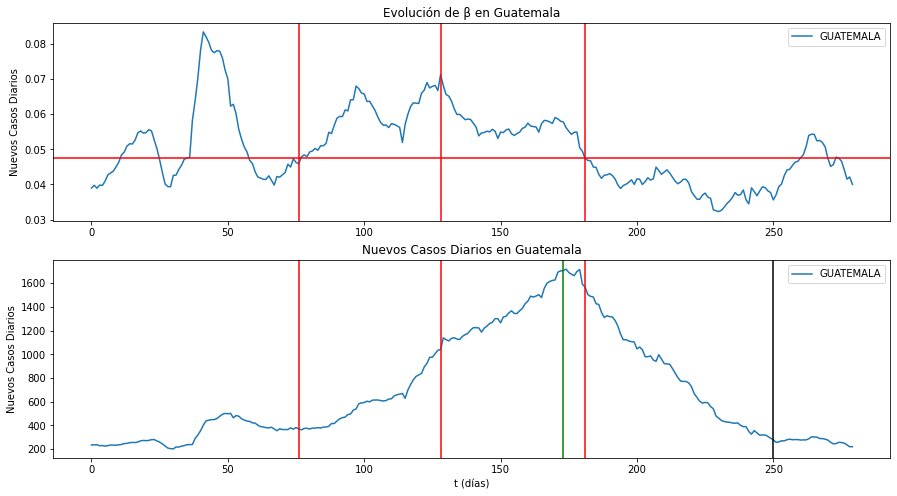

In [59]:
#analizar
fig, ax = plt.subplots(2,1, figsize=(15, 8))
ax[0].plot(Beta[0][280 + 80:640], label = NOMBREDEPTO[0])
ax[0].axhline(y = 1/21., color = 'r', linestyle = '-')
ax[0].axvline(x = 76., color = 'r', linestyle = '-')
ax[0].axvline(x = 181., color = 'r', linestyle = '-')
ax[0].axvline(x = 128., color = 'r', linestyle = '-')

ax[0].legend(loc="best")
ax[0].set_title("Evolución de \u03B2 en Guatemala")
#ax[0].set_xlabel("t (días)")
ax[0].set_ylabel("Nuevos Casos Diarios")

ax[1].plot(dA[0][280 + 80:640], label = NOMBREDEPTO[0])
ax[1].axvline(x = 76., color = 'r', linestyle = '-')
ax[1].axvline(x = 181., color = 'r', linestyle = '-')
ax[1].axvline(x = 128., color = 'r', linestyle = '-')
ax[1].axvline(x = 250., color = 'k', linestyle = '-')
ax[1].axvline(x = 173., color = 'g', linestyle = '-')


ax[1].legend(loc="best")
ax[1].set_title("Nuevos Casos Diarios en Guatemala")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")


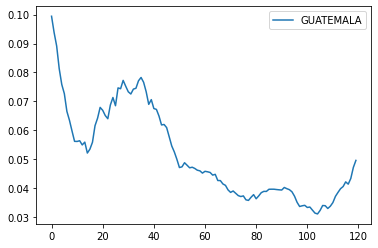

In [37]:
#analizar la primera ola
#plt.plot(dA[0][60:250], label = NOMBREDEPTO[0])
plt.plot(Beta[0][80:200], label = NOMBREDEPTO[0])
plt.legend(loc="best")

In [38]:
gamma = 1./21.

In [39]:
BETA_MIN = []
BETA_MAX = []
DEPTOS = []
VACUNACION = []
R_0 = []
for i in range(len(NOMBREDEPTO)):
    BETA_MIN.append(Beta[i][80:250].min()), BETA_MAX.append(Beta[i][80:250].max()), DEPTOS.append(NOMBREDEPTO[i]),
    R_0.append(Beta[i][80:250].max()/gamma), VACUNACION.append(1-gamma/Beta[i][80:250].max())
IntervalosBeta = { "DEPTO":DEPTOS, "Beta Min" : BETA_MIN, "Beta MAX" : BETA_MAX, "R0":R_0, "nu":VACUNACION}
dfBeta = pd.DataFrame(data=IntervalosBeta)

In [40]:
#dfBeta

In [41]:
#Restricciones 28 de marzo 2020
#plt.plot(dA[0][60:200])

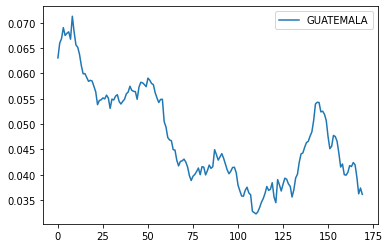

In [42]:
plt.plot(Beta[0][80+ 400:80 + 570], label = NOMBREDEPTO[0])
plt.legend(loc="best")

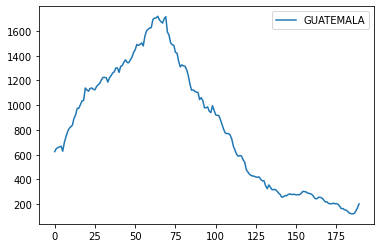

In [43]:
plt.plot(dA[0][70+ 400: 80 + 580], label = NOMBREDEPTO[0])
plt.legend(loc="best")


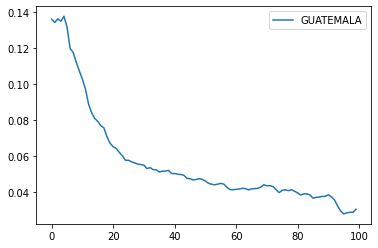

In [44]:
plt.plot(Beta[0][80 + 590:80+690], label = NOMBREDEPTO[0])
plt.legend(loc="best")

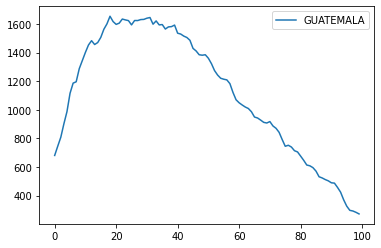

In [45]:
plt.plot(dA[0][80 + 590:80+690], label = NOMBREDEPTO[0])
plt.legend(loc="best")

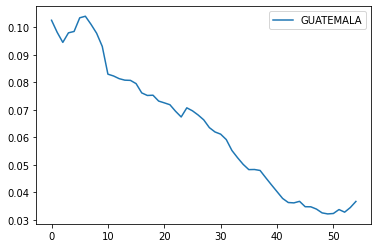

In [46]:
plt.plot(Beta[0][80 + 755:80+810], label = NOMBREDEPTO[0])
plt.legend(loc="best")

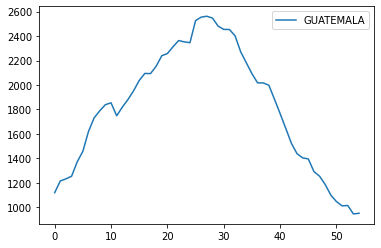

In [47]:
plt.plot(dA[0][80 + 755:80+810], label = NOMBREDEPTO[0])
plt.legend(loc="best")

In [48]:
from scipy import stats

def myfunc(x):
    X = []
    for i in range(len(x)):
        X.append(slope * x[i] + intercept)
    return X



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


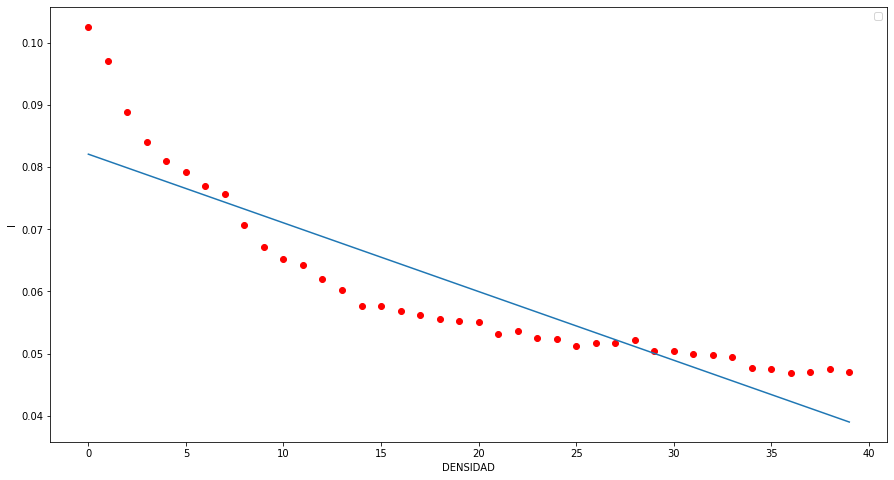

In [49]:
n=0
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(Beta[n][80 + 600:80+640])):
    x.append(i)
    y.append(Beta[n][i+80+600]) #no está desfasado 1?


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
#for i in OCCIDENTE:
#    plt.scatter(np.log(Densidad[i]), np.log(np.array(AREA[i])), label=NOMBREDEPTO[i])
for i in range(len(Beta[n][80 + 600:80+640])):
    plt.scatter(x[i], Beta[n][i+80+600], color='r')
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
plt.xlabel("DENSIDAD")
plt.ylabel("I")
plt.show()

In [50]:

slope, intercept, r, p, std_err

(-0.0011053422560720041,
 0.08208107890337565,
 -0.8912292572624532,
 1.28321946601612e-14,
 9.125226972792499e-05)

In [51]:
#y = slope*x + intercept
x_interseccion = -intercept/slope
x_interseccion

74.25851898131789

In [52]:
maximo = (1./21. - intercept)/slope
maximo

31.177701833994767

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


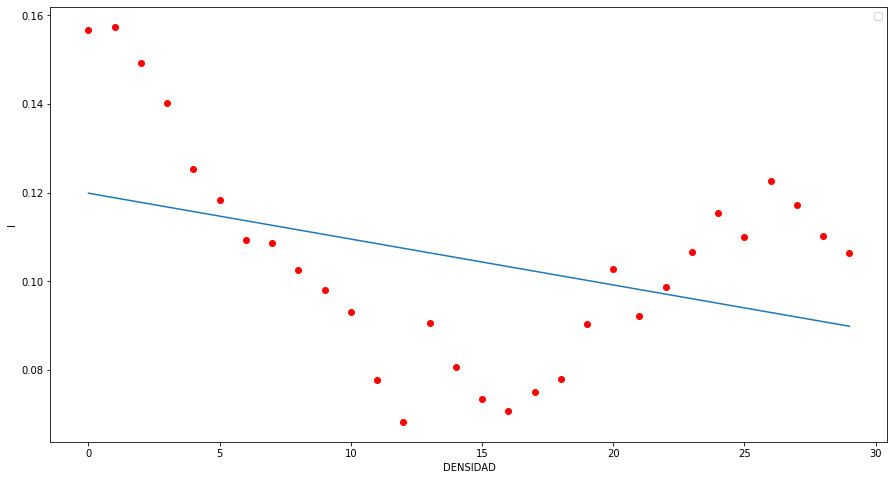

In [53]:
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(Beta[11][80:110])):
    x.append(i)
    y.append(Beta[11][i+80])


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
#for i in OCCIDENTE:
#    plt.scatter(np.log(Densidad[i]), np.log(np.array(AREA[i])), label=NOMBREDEPTO[i])
for i in range(len(Beta[11][80:110])):
    plt.scatter(x[i], Beta[11][i+80], color='r')
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
plt.xlabel("DENSIDAD")
plt.ylabel("I")
plt.show()

In [54]:

slope, intercept, r, p, std_err

(-0.0010355163304770912,
 0.11987302138752146,
 -0.37385964230202107,
 0.04183329714925357,
 0.0004854856326862674)

In [55]:
#y = slope*x + intercept
x_interseccion = -intercept/slope
x_interseccion

115.76159434616798

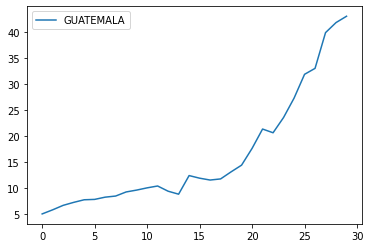

In [56]:
#analizar la primera ola
#plt.plot(dA[0][60:250], label = NOMBREDEPTO[0])
plt.plot(dA[11][80:110], label = NOMBREDEPTO[0])
plt.legend(loc="best")

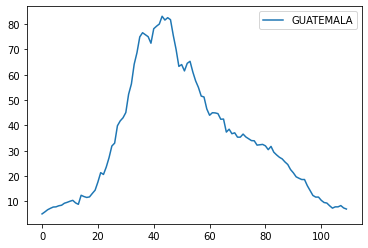

In [57]:
#analizar la primera ola
#plt.plot(dA[0][60:250], label = NOMBREDEPTO[0])
plt.plot(dA[11][80:190], label = NOMBREDEPTO[0])
plt.legend(loc="best")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


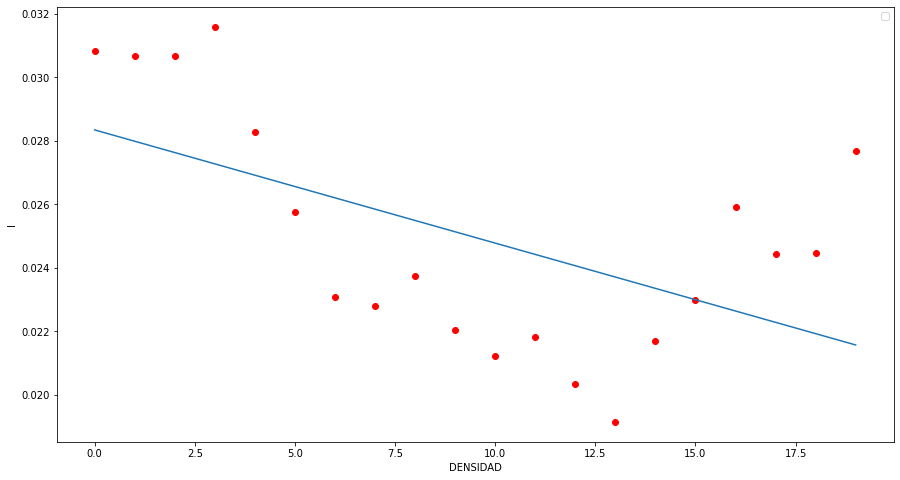

In [58]:
x = []
y = []
for i in range(len(Beta[11][170:190])):
    x.append(i)
    y.append(Beta[11][i+170])


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
#for i in OCCIDENTE:
#    plt.scatter(np.log(Densidad[i]), np.log(np.array(AREA[i])), label=NOMBREDEPTO[i])
for i in range(len(Beta[11][170:190])):
    plt.scatter(x[i], Beta[11][i+170], color='r')
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
plt.xlabel("DENSIDAD")
plt.ylabel("I")
plt.show()

In [59]:
x = []
y = []
Beta_prima = []
Beta_array = []
t1 = 100
t2=800
n=0

color = []
T = t2-t1
for i in range(T):
    color.append(i)

for i in range(len(Beta[n][t1:t2])):
    x.append(i)
    y.append(dA[n][i+t1])
    Beta_prima.append(Beta[n][i+1+t1] -Beta[n][i+t1])
    Beta_array.append(Beta[n][i+t1])

In [60]:
npy = np.array(y)
npBeta_prima = np.array(Beta_prima)
npBeta_array = np.array(Beta_array)